In [23]:
import pandas as pd

In [24]:
import numpy as np


In [25]:
data = {
    'id' : [101,102,103,104,105,106],
    'math_score': [88,92,np.nan,45,99,300],
    'science_score':[85,79,91,76,88,60],

    'english_score':[78,85,80,np.nan,82,74],
    'attendace':[92,87,90,85,100,40]
}

In [26]:
df = pd.DataFrame(data)

In [27]:
df

,id,math_score,science_score,english_score,attendace
0,101,88.0,85,78.0,92
1,102,92.0,79,85.0,87
2,103,NaN,91,80.0,90
3,104,45.0,76,NaN,85
4,105,99.0,88,82.0,100
5,106,300.0,60,74.0,40


In [28]:
df.isnull().sum()

id               0
math_score       1
science_score    0
english_score    1
attendace        0
dtype: int64

In [29]:
df['math_score'].fillna(df['math_score'].mean().inplace = True)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (4192799185.py, line 1)

In [30]:
df['math_score'] = df['math_score'].fillna(df['math_score'].mean())

In [31]:
df

,id,math_score,science_score,english_score,attendace
0,101,88.0,85,78.0,92
1,102,92.0,79,85.0,87
2,103,124.8,91,80.0,90
3,104,45.0,76,NaN,85
4,105,99.0,88,82.0,100
5,106,300.0,60,74.0,40


In [32]:
df['english_score'] = df['english_score'].fillna(df['english_score'].mean())

In [33]:
df


,id,math_score,science_score,english_score,attendace
0,101,88.0,85,78.0,92
1,102,92.0,79,85.0,87
2,103,124.8,91,80.0,90
3,104,45.0,76,79.8,85
4,105,99.0,88,82.0,100
5,106,300.0,60,74.0,40


In [34]:
def detect_outliers_iqr(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return col[(col<lower_bound) | (col>upper_bound)]

In [35]:
outlier_math = detect_outliers_iqr(df['math_score'])
outlier_attendence = detect_outliers_iqr(df['attendace'])

In [36]:
print("Math Score Outliers:\n",outlier_math)

Math Score Outliers:
 5    300.0
Name: math_score, dtype: float64


In [37]:
def cap_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    col = np.where(col>ub,ub,col)
    col = np.where(col<lb,lb,col)
    return col

In [38]:
df['math_score'] = cap_outliers(df['math_score'])

In [39]:
df

,id,math_score,science_score,english_score,attendace
0,101,88.000,85,78.0,92
1,102,92.000,79,85.0,87
2,103,124.800,91,80.0,90
3,104,45.000,76,79.8,85
4,105,99.000,88,82.0,100
5,106,162.375,60,74.0,40


In [40]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns

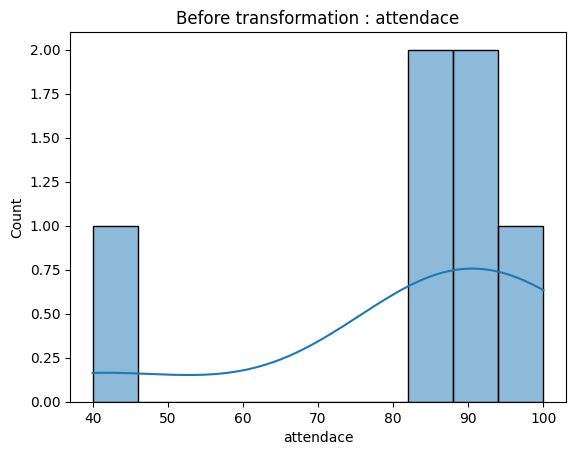

In [46]:
sns.histplot(df['attendace'],kde = True)
plt.title('Before transformation : attendace')
plt.show()


In [43]:
df['log_attendace'] = np.log1p(df['attendace'])

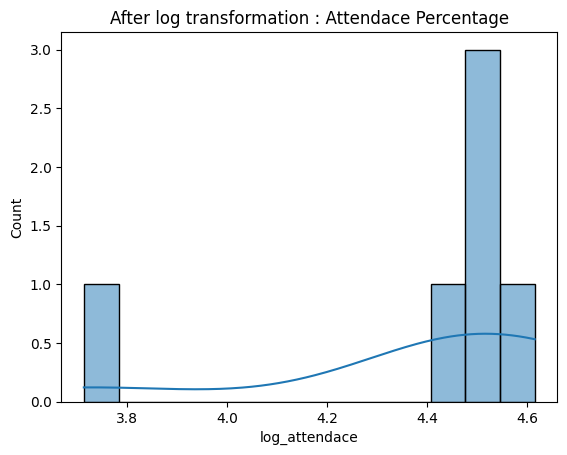

In [47]:
sns.histplot(df['log_attendace'],kde = True)
plt.title("After log transformation : Attendace Percentage")
plt.show()
          